$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

In [1]:
!pip install qiskit qiskit_aer qiskit_ibm_runtime

global phase: π
        ┌─────────┐┌────┐┌─────────┐     ┌──────────┐┌────┐┌─────────┐      »
   q_0: ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■──┤ Rz(-π/2) ├┤ √X ├┤ Rz(π/2) ├───■──»
        └─────────┘└────┘└─────────┘┌─┴─┐├─────────┬┘├────┤├─────────┴┐┌─┴─┐»
   q_1: ────────────────────────────┤ X ├┤ Rz(π/2) ├─┤ √X ├┤ Rz(-π/2) ├┤ X ├»
                                    └───┘└─────────┘ └────┘└──────────┘└───┘»
   q_2: ────────────────────────────────────────────────────────────────────»
                                                                            »
   q_3: ────────────────────────────────────────────────────────────────────»
                                                                            »
   q_4: ────────────────────────────────────────────────────────────────────»
                                                                            »
   q_5: ────────────────────────────────────────────────────────────────────»
                                                

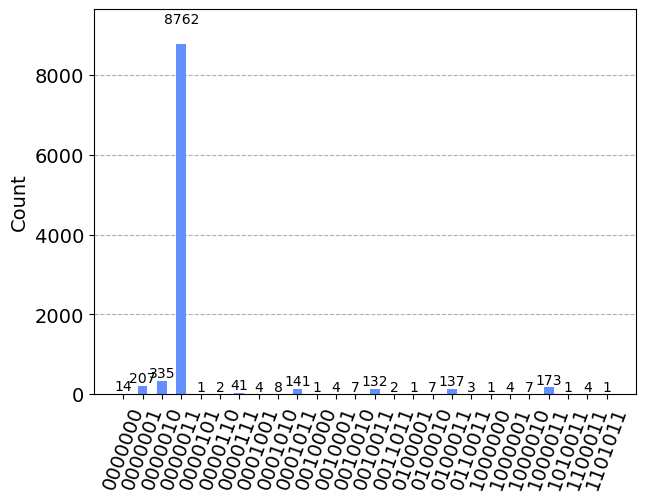

In [2]:
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile, execute, Aer
from qiskit.tools.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService

def parseMultiGateError(input_str):
    parts = input_str.split(':')
    gates = parts[0]
    error = float(parts[1])
    gate_parts = gates.split("_")
    gate_1 = float(gate_parts[0])
    gate_2 = float(gate_parts[1])
    return [gate_1, gate_2, error]
    


time_measure = 1000 # 1 microsecond

f = open("lagos.csv", "r")
contents = f.read()
lines = contents.split('\n')
lines = lines[1:]
qubit_data = []
for idx, line in enumerate(lines):
    components=line.split(',')
    if(len(components)<=1):
        continue
    data = {}
    data["qbit"]=int(components[0]) # done
    data["t1_us"]=float(components[1]) # done
    data["t2_us"]=min(data["t1_us"]*2,float(components[2])) # done # Why is this data initially wrong? eg t1 ~= 75 and t2 ~=155 for cairo
    data["frequency_ghz"]=float(components[3]) # done
    data["anharmonicity_ghz"]=float(components[4])
    data["readout_assignment_error"]=components[5]
    data["prob_meas_0_prep_1"]=float(components[6]) # done
    data["prob_meas_1_prep_0"]=float(components[7]) # done
    data["readout_length_ns"]=components[8]
    data["id_error"]=float(components[9]) # done
    data["sqrt_x_error"]=float(components[10]) # done
    data["pauli_x_error"]=float(components[11]) # done
    cnot_parts = components[12].split(';')
    cnot_errors = map(parseMultiGateError,cnot_parts)
    data["cnot_errors"]=cnot_errors # done
    gate_time_parts = components[13].split(';')
    gate_time_errors = map(parseMultiGateError, gate_time_parts)
    data["gate_time_errors"] = gate_time_errors
    qubit_data.append(data)
    
nm = NoiseModel()

take = len(qubit_data)

for qbit in qubit_data[:take]:
    bit = [qbit["qbit"]]
    # Create thermal relaxtion errors for t1 and t2 times
    thermal_err = thermal_relaxation_error(qbit["t1_us"], qbit["t2_us"], 1/qbit["frequency_ghz"], 1)
    nm.add_quantum_error(thermal_err,['i'],bit)
    
    # Create readout error for wrong measurements
    readout_err = ReadoutError([[1-qbit["prob_meas_1_prep_0"],qbit["prob_meas_1_prep_0"]],[qbit["prob_meas_0_prep_1"],1-qbit["prob_meas_0_prep_1"]]])
    nm.add_readout_error(readout_err, bit)
    
    # Create a Pauli error for the X gate
    error_pauli_x = pauli_error([('X', qbit["pauli_x_error"]), ('I', 1 - qbit["pauli_x_error"])])
    nm.add_quantum_error(error_pauli_x,["x"],bit)
    
    # Create CNOT error for CX gate
    for cnot_err in qbit["cnot_errors"]:
        cnot_error = pauli_error([('X', cnot_err[2]), ('I', 1 - cnot_err[2])])
        cnot_error = cnot_error.tensor(cnot_error)
        nm.add_quantum_error(cnot_error, ['cx'], [cnot_err[0], cnot_err[1]])
        
    # Create Square root(x) error for SX gate
    sx_err = depolarizing_error(qbit["sqrt_x_error"],1)
    nm.add_quantum_error(sx_err, ['sx'], bit)
    
    # Create Identity error for id gate
    id_err = depolarizing_error(qbit["id_error"], 1)
    nm.add_quantum_error(id_err, ['id'], bit)
    
    
n_qubits = take
circuit = QuantumCircuit(n_qubits)

# Test Circuit
circuit.h(0)
circuit.h(1)
circuit.h(1)
circuit.cx(0, 1)
circuit.h(1)
circuit.h(0)
circuit.h(1)
circuit.x(0)
circuit.x(1)
circuit.h(1)
circuit.cx(0, 1)
circuit.h(1)
circuit.x(0)
circuit.x(1)
circuit.h(0)
circuit.h(1)
circuit.measure_all()

sim_noise = AerSimulator(noise_model=nm)
transpiled = transpile(circuit, sim_noise)
print(transpiled)
result = sim_noise.run(transpiled, shots=10000).result()

counts = result.get_counts(0)

# Plot noisy output
plot_histogram(counts)

The next cell contains the other way of emulating a device using the fake_providers provided by qiskit and overriding their data with the calibration data

global phase: π
         ┌─────────┐┌────┐┌─────────┐     ┌──────────┐┌────┐┌─────────┐      »
q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■──┤ Rz(-π/2) ├┤ √X ├┤ Rz(π/2) ├───■──»
         └─────────┘└────┘└─────────┘┌─┴─┐├─────────┬┘├────┤├─────────┴┐┌─┴─┐»
q_1 -> 1 ────────────────────────────┤ X ├┤ Rz(π/2) ├─┤ √X ├┤ Rz(-π/2) ├┤ X ├»
                                     └───┘└─────────┘ └────┘└──────────┘└───┘»
q_2 -> 2 ────────────────────────────────────────────────────────────────────»
                                                                             »
q_3 -> 3 ────────────────────────────────────────────────────────────────────»
                                                                             »
q_4 -> 4 ────────────────────────────────────────────────────────────────────»
                                                                             »
q_5 -> 5 ────────────────────────────────────────────────────────────────────»
                                    

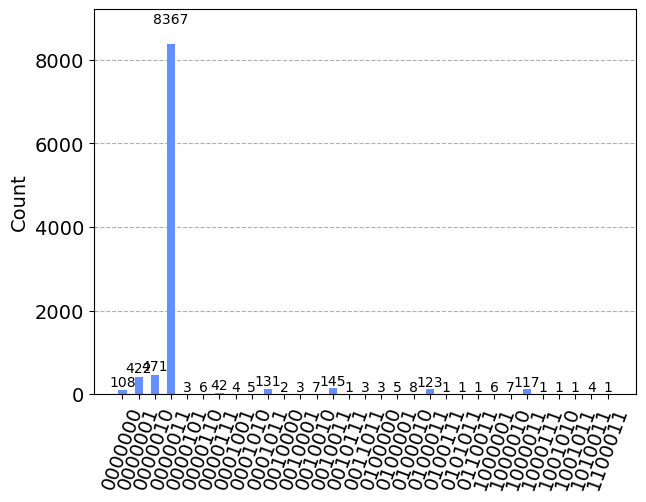

In [15]:
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile, execute, Aer
from qiskit.tools.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.providers.fake_provider import ConfigurableFakeBackend, FakeLagosV2
from pkg_resources import resource_filename
import json

def parseMultiGateError(input_str):
    parts = input_str.split(':')
    gates = parts[0]
    error = float(parts[1])
    gate_parts = gates.split("_")
    gate_1 = int(gate_parts[0])
    gate_2 = int(gate_parts[1])
    return [gate_1, gate_2, error]
    
f_csv = open("lagos.csv", "r")
contents = f_csv.read()
f_csv.close()
lines = contents.split('\n')
lines = lines[1:]
qubit_data = []
for idx, line in enumerate(lines):
    components=line.split(',')
    if(len(components)<=1):
        continue
    data = {}
    data["qbit"]=int(components[0]) # done
    data["t1_us"]=float(components[1]) # done
    data["t2_us"]=min(data["t1_us"]*2,float(components[2])) # done # Why is this data initially wrong? eg t1 ~= 75 and t2 ~=155 for cairo
    data["frequency_ghz"]=float(components[3]) # done
    data["anharmonicity_ghz"]=float(components[4])
    data["readout_assignment_error"]=float(components[5])
    data["prob_meas_0_prep_1"]=float(components[6]) # done
    data["prob_meas_1_prep_0"]=float(components[7]) # done
    data["readout_length_ns"]=float(components[8])
    data["id_error"]=float(components[9]) # done
    data["sqrt_x_error"]=float(components[10]) # done
    data["pauli_x_error"]=float(components[11]) # done
    cnot_parts = components[12].split(';')
    cnot_errors = map(parseMultiGateError,cnot_parts)
    data["cnot_errors"]=cnot_errors # done
    gate_time_parts = components[13].split(';')
    gate_time_errors = map(parseMultiGateError, gate_time_parts)
    data["gate_time_errors"] = gate_time_errors
    qubit_data.append(data)
    

date = "2023-11-16T11:00:00+02:00"
props = {
    "backend_name": "fake_lagos",
    "backend_version": "0.0.1",
    "last_update_date": date,
    "qubits": []
}

coupling_map = []
t1_times = []
t2_times = []
freqs = []
readout_errs = []

props_path = (resource_filename("qiskit.providers.fake_provider.backends.lagos","props_lagos.json"))

f_output = open(props_path, "w")
# This file is the initial values in case we screw something up
f_default = open("default.json", "r")
default_props = f_default.read()
f_default.close()
f_output.write(default_props)
f_output.close()

f = open(props_path, "r")
contents = f.read()
config = json.loads(contents)
config["qubits"] = []
config["gates"] = []

for qbit in qubit_data:
    bit = [qbit["qbit"]]
    curr_bit = []
    curr_bit.append({
        "date": date,
        "name": "T1",
        "unit": "us",
        "value": qbit["t1_us"],
    })
    curr_bit.append({
        "date": date,
        "name": "T2",
        "unit": "us",
        "value": qbit["t2_us"],
    })
    curr_bit.append({
        "date": date,
        "name": "frequency",
        "unit": "GHz",
        "value": qbit["frequency_ghz"],
    })
    curr_bit.append({
        "date": date,
        "name": "anharmonicity",
        "unit": "GHz",
        "value": qbit["anharmonicity_ghz"],
    })
    curr_bit.append({
        "date": date,
        "name": "readout_error",
        "unit": "",
        "value": qbit["readout_assignment_error"],
    })
    curr_bit.append({
        "date": date,
        "name": "prob_meas0_prep1",
        "unit": "",
        "value": qbit["prob_meas_0_prep_1"],
    })
    curr_bit.append({
        "date": date,
        "name": "prob_meas1_prep0",
        "unit": "us",
        "value": qbit["prob_meas_1_prep_0"],
    })
    curr_bit.append({
        "date": date,
        "name": "readout_length",
        "unit": "ns",
        "value": qbit["readout_length_ns"],
    })
    config["qubits"].append(curr_bit)
    
    config["gates"].append({
        "qubits": bit,
        "gate": "id",
        "parameters": [
            { 
               "date": date,
                "name": "gate_error",
                "unit": "",
                "value": qbit["id_error"]
            },
            {
                "date": date,
                "name": "gate_length",
                "unit": "ns",
                "value": qbit["readout_length_ns"]
            }
        ],
        "name": "id"+ str(qbit["qbit"])
    })
    config["gates"].append({
        "qubits": bit,
        "gate": "rz",
        "parameters": [
            { 
               "date": date,
                "name": "gate_error",
                "unit": "",
                "value": 0
            },
            {
                "date": date,
                "name": "gate_length",
                "unit": "ns",
                "value": 0
            }
        ],
        "name": "rz"+ str(qbit["qbit"])
    })
    config["gates"].append({
        "qubits": bit,
        "gate": "sx",
        "parameters": [
            { 
               "date": date,
                "name": "gate_error",
                "unit": "",
                "value": qbit["sqrt_x_error"]
            },
            {
                "date": date,
                "name": "gate_length",
                "unit": "ns",
                "value": qbit["readout_length_ns"]
            }
        ],
        "name": "sx"+ str(qbit["qbit"])
    })
    config["gates"].append({
        "qubits": bit,
        "gate": "x",
        "parameters": [
            { 
               "date": date,
                "name": "gate_error",
                "unit": "",
                "value": qbit["pauli_x_error"]
            },
            {
                "date": date,
                "name": "gate_length",
                "unit": "ns",
                "value": qbit["readout_length_ns"]
            }
        ],
        "name": "x"+ str(qbit["qbit"])
    })
    for cnot_err in qbit["cnot_errors"]:
        config["gates"].append({
            "qubits": [cnot_err[0], cnot_err[1]],
            "gate": "cx",
            "parameters": [
                { 
                   "date": date,
                    "name": "gate_error",
                    "unit": "",
                    "value": cnot_err[2]
                },
                {
                    "date": date,
                    "name": "gate_length",
                    "unit": "ns",
                    "value": qbit["readout_length_ns"]
                }
            ],
            "name": "cx"+ str(cnot_err[0]) + "_" + str(cnot_err[1])
        })


f_output = open(props_path, "w")
stringified = json.dumps(config)
f_output.write(stringified)
f_output.close()
    
    
circuit = QuantumCircuit(len(qubit_data))






# Test Circuit
circuit.h(0)
circuit.h(1)
circuit.h(1)
circuit.cx(0, 1)
circuit.h(1)
circuit.h(0)
circuit.h(1)
circuit.x(0)
circuit.x(1)
circuit.h(1)
circuit.cx(0, 1)
circuit.h(1)
circuit.x(0)
circuit.x(1)
circuit.h(0)
circuit.h(1)
circuit.measure_all()

transpiled = transpile(circuit, FakeLagosV2())
print(transpiled)
result = FakeLagosV2().run(transpiled, shots=10000).result()

counts = result.get_counts(0)

# Plot noisy output
plot_histogram(counts)
